## simulations plots (results from simulations_v4)

In [166]:
import numpy as np
import scipy as sp
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import linalg as LA

import pickle

%matplotlib notebook
import matplotlib.pyplot as plt
import pylab

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
with open("simulation0_v5.pkl", "rb") as f:
    ss0, otu_bh0, otu_fbh0, otu_ds0, pval_bh0, pval_fbh0, pval_ds0 = pickle.load(f)

In [168]:
with open("simulation1_v5.pkl", "rb") as f:
    ss1, otu_bh1, otu_fbh1, otu_ds1, FDR_bh1, FDR_fbh1, FDR_ds1, pval_bh1, pval_fbh1, pval_ds1 = pickle.load(f)

In [15]:
with open("simulation2_v5.pkl", "rb") as f:
    d, otu_bh2, otu_fbh2, otu_ds2, FDR_bh2, FDR_fbh2, FDR_ds2, pval_bh2, pval_fbh2, pval_ds2 = pickle.load(f) 

In [42]:
'''
with open("simulation0_v2.pkl", "rb") as f:
results0 = pickle.load(f)
with open("simulation1_v2.pkl", "rb") as f:
results1 = pickle.load(f)
with open("simulation2_v2.pkl", "rb") as f:
results2 = pickle.load(f)
print(results2['d'])
'''

## simulation 0

<IPython.core.display.Javascript object>


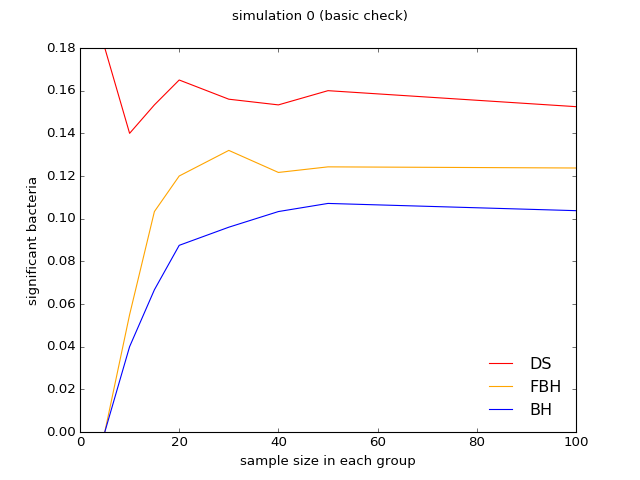

In [169]:
plt.figure()
plt.plot(ss0, otu_ds0, color = 'red', label = 'DS')
plt.plot(ss0, otu_fbh0, color = 'orange', label = 'FBH')
plt.plot(ss0, otu_bh0, color = 'blue', label = 'BH')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation 0 (basic check)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')

1.96344655345


<IPython.core.display.Javascript object>


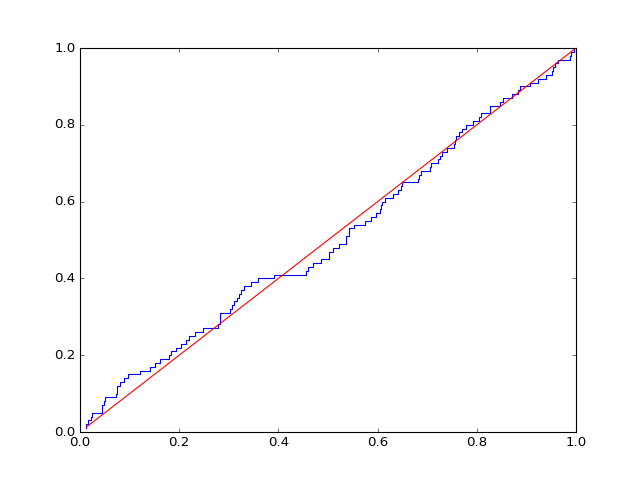

In [170]:
sample = pval_ds0[698]
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)
print(LA.norm(x - y, 1))

plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')

## simulation 1

<IPython.core.display.Javascript object>


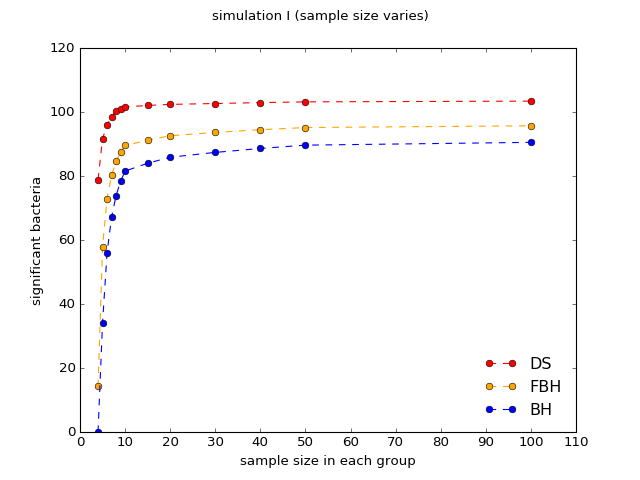

([<matplotlib.axis.XTick at 0x13bc1a898>,
 <a list of 12 Text xticklabel objects>)

In [171]:
plt.figure()
plt.plot(ss1, otu_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(ss1, otu_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, otu_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')
plt.xticks(np.arange(0,120,10))

<IPython.core.display.Javascript object>


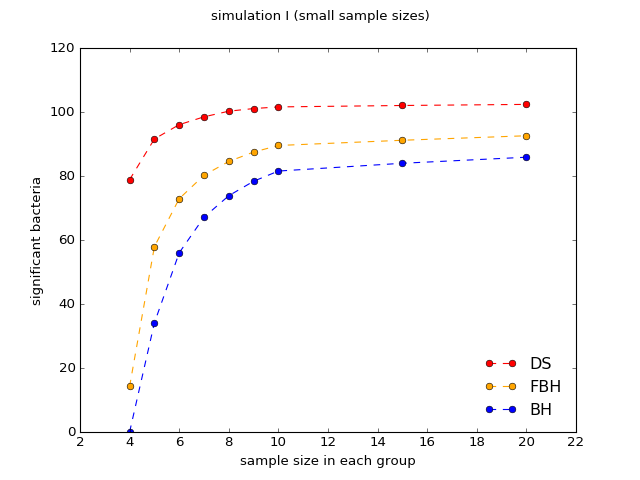

([<matplotlib.axis.XTick at 0x13bf4e358>,
 <a list of 11 Text xticklabel objects>)

In [172]:
plt.figure()
plt.plot(ss1[0:9], otu_ds1[0:9], linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(ss1[0:9], otu_fbh1[0:9], linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1[0:9], otu_bh1[0:9], linestyle='--', marker='o', color = 'blue', label = 'BH')

pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (small sample sizes)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')
plt.xticks(np.arange(2,24,2))

<IPython.core.display.Javascript object>


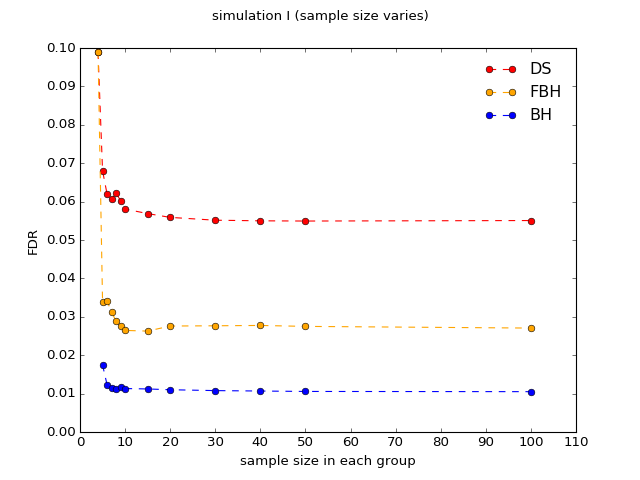

([<matplotlib.axis.YTick at 0x137c386d8>,
 <a list of 11 Text yticklabel objects>)

In [173]:
plt.figure()
#plt.axhline(0.1, color = 'green', label = 'nominal level')
plt.plot(ss1, FDR_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(ss1, FDR_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, FDR_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc = 'upper right', frameon=False)
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('FDR')
plt.xticks(np.arange(0,120,10))
#pylab.xlim([0, 110])
plt.yticks(np.arange(0,0.11, 0.01))

In [174]:
sample1 = pval_ds1[98]  # pvals for smaple size = 4
ecdf1 = ECDF(sample1)
x1 = np.sort(sample1)
y1 = ecdf1(x1)

sample2 = pval_ds1[298]  # pvals for smaple size = 6
ecdf2 = ECDF(sample2)
x2 = np.sort(sample2)
y2 = ecdf2(x2)

sample3 = pval_ds1[780]  # pvals for smaple size = 15 
ecdf3 = ECDF(sample3)
x3 = np.sort(sample3)
y3 = ecdf3(x3)

sample4 = pval_ds1[480]  # pvals for smaple size = 8
ecdf4 = ECDF(sample4)
x4 = np.sort(sample4)
y4 = ecdf4(x4)

<IPython.core.display.Javascript object>


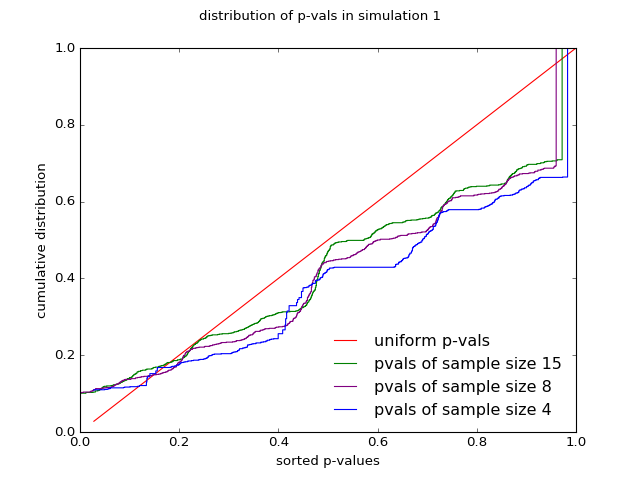

In [175]:
plt.figure()
plt.plot(x1, x1, color = 'red', label = 'uniform p-vals')

plt.step(x3, y3, color = 'green', label = 'pvals of sample size 15')
plt.step(x4, y4, color = 'purple', label = 'pvals of sample size 8')
#plt.step(x2, y2, color = 'orange', label = 'pvals of sample size 6')
plt.step(x1, y1, color = 'blue', label = 'pvals of sample size 4')

pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('distribution of p-vals in simulation 1')
plt.xlabel('sorted p-values')
plt.ylabel('cumulative distribution')

## simulation 2

<IPython.core.display.Javascript object>


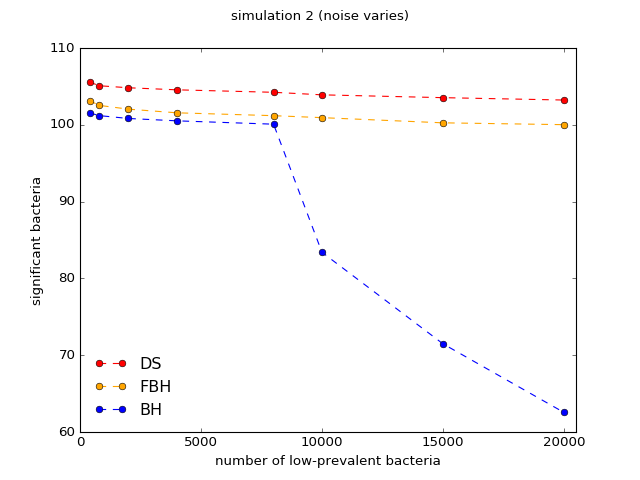

([<matplotlib.axis.YTick at 0x137094630>,
 <a list of 6 Text yticklabel objects>)

In [140]:
plt.figure()
plt.plot(d, otu_ds2, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(d, otu_fbh2, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(d, otu_bh2, linestyle='--', marker='o', color = 'blue', label = 'BH')

pylab.legend(loc ='lower left', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('significant bacteria')
#plt.xticks([0, 5000, 10000, 15000, 20000, 20500])
pylab.xlim([0, 20500])
plt.yticks(np.arange(60, 120, 10))

In [145]:
print(d)

[400, 800, 2000, 4000, 8000, 10000, 15000, 20000]


<IPython.core.display.Javascript object>


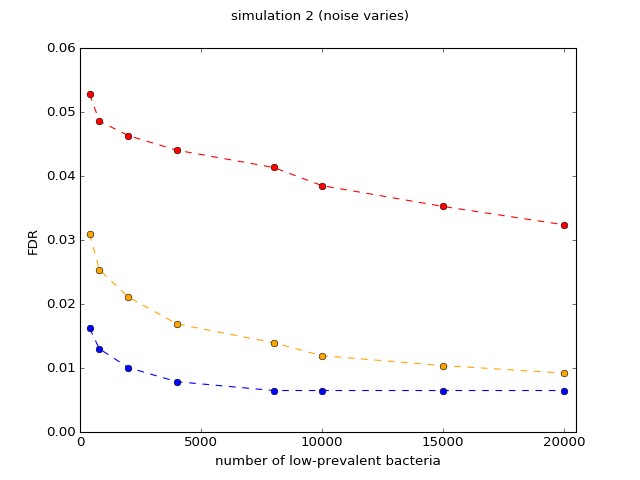

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(0, 20500)

In [144]:
plt.figure()
plt.plot(d, FDR_ds2, linestyle='--', marker='o', color = 'red')
plt.plot(d, FDR_fbh2, linestyle='--', marker='o', color = 'orange')
plt.plot(d, FDR_bh2, linestyle='--', marker='o', color = 'blue')

pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('FDR')
pylab.xlim([0, 20500])

In [148]:
sample1 = pval_ds2[398]  # pvals for d=4k
ecdf1 = ECDF(sample1)
x1 = np.sort(sample1)
y1 = ecdf1(x1)

sample2 = pval_ds2[490]  # pvals for d=8k
ecdf2 = ECDF(sample2)
x2 = np.sort(sample2)
y2 = ecdf2(x2)

sample3 = pval_ds2[578]  # pvals for d=10k
ecdf3 = ECDF(sample3)
x3 = np.sort(sample3)
y3 = ecdf3(x3)

sample4 = pval_ds2[660]  # pvals for smaple size = 15k
ecdf4 = ECDF(sample4)
x4 = np.sort(sample4)
y4 = ecdf4(x4)

sample5 = pval_ds2[770]  # pvals for smaple size = 20k
ecdf5 = ECDF(sample5)
x5 = np.sort(sample5)
y5 = ecdf5(x5)


In [156]:
print(np.sum(y1))
print(np.sum(y2))
print(np.sum(y3))
print(np.sum(y4))
print(np.sum(y5))

print('...')
print(np.sum(x1))
print(np.sum(x2))
print(np.sum(x3))
print(np.sum(x4))

2372.01214286
4652.34926829
5808.89598039
8655.32138158
11517.5957921
...
2778.81618382
5515.84415584
6886.71328671
10249.4525475


<IPython.core.display.Javascript object>


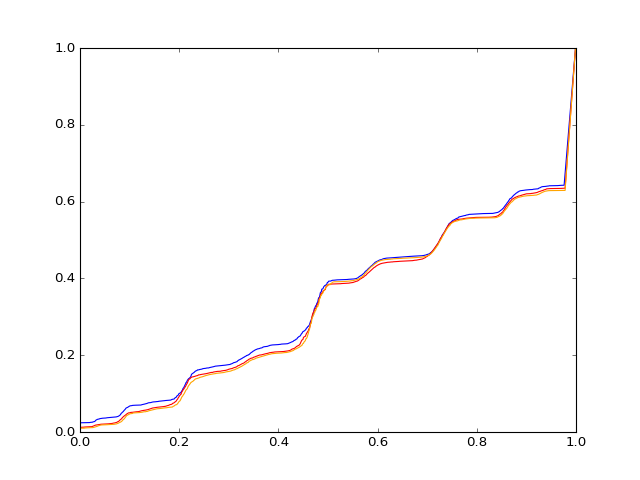

In [165]:
plt.figure()
plt.plot(x1, y1, color = 'blue')
plt.plot(x2, y2, color = 'red')
plt.plot(x3, y3, color = 'orange')

<IPython.core.display.Javascript object>


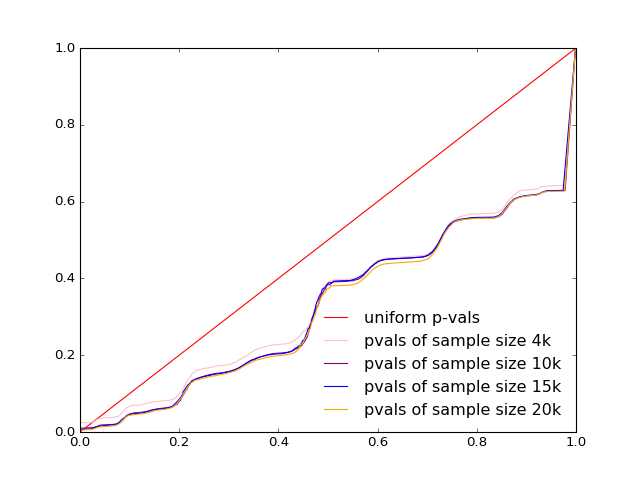

In [161]:
plt.figure()
plt.plot(x1, x1, color = 'red', label = 'uniform p-vals')
plt.plot(x1, y1, color = 'pink', label = 'pvals of sample size 4k')
#plt.step(x2, y2, color = 'green', label = 'pvals of sample size 8k')
plt.plot(x3, y3, color = 'purple', label = 'pvals of sample size 10k')
plt.plot(x4, y4, color = 'blue', label = 'pvals of sample size 15k')
plt.plot(x5, y5, color = 'orange', label = 'pvals of sample size 20k')
pylab.legend(loc ='lower right', frameon=False)

<IPython.core.display.Javascript object>


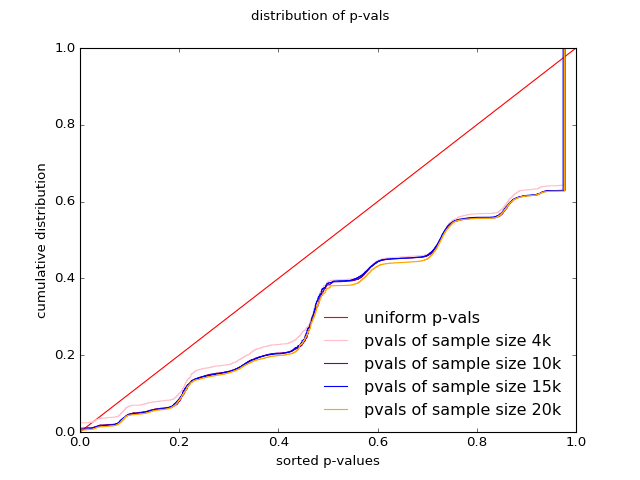

In [160]:
plt.figure()
plt.plot(x1, x1, color = 'red', label = 'uniform p-vals')
plt.step(x1, y1, color = 'pink', label = 'pvals of sample size 4k')
#plt.step(x2, y2, color = 'green', label = 'pvals of sample size 8k')
plt.step(x3, y3, color = 'purple', label = 'pvals of sample size 10k')
plt.step(x4, y4, color = 'blue', label = 'pvals of sample size 15k')
plt.step(x5, y5, color = 'orange', label = 'pvals of sample size 20k')
pylab.legend(loc ='lower right', frameon=False)
#pylab.ylim([0, 0.11])
plt.suptitle('distribution of p-vals')
plt.xlabel('sorted p-values')
plt.ylabel('cumulative distribution')